## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [45]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head(4)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
df.query('converted == 1').user_id.nunique()/df.shape[0]

0.1194418598333322

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.query('(group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page != "old_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [9]:
 df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2.shape[0] #thats true

290585

In [15]:
df2[df2['user_id'].duplicated() == True]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [18]:
df2.drop(1899, axis=0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2.query('converted == 1')['converted'].count()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.query('group == "control" and converted == 1')['converted'].count()/df2.query('group == "control"')['converted'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2.query('group == "treatment" and converted ==1')['converted'].count()/df2.query('group == "treatment"')['converted'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2.query('landing_page == "new_page"')['converted'].count()/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is no sufficient evidence that the new treatment page leads to more conversions, the probability of an individual in the treatment group isn't higher than for an individual in the control group - in fact it is almost the same (12.04% in the control group and 11.88% in the treatment group).**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: $p_{old}$ >= $p_{new}$ transforms into: $p_{new}$ - $p_{old}$ <= 0**

**H1: $p_{old}$ < $p_{new}$ transforms into:  $p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
p_new = df2.query('converted == 1')['converted'].count()/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null?

In [27]:
p_old = df2.query('converted == 1')['converted'].count()/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [28]:
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()
n_new

145310

d. What is $n_{old}$?

In [29]:
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# a= takes an array to draw a sample from (possible outcomes [0,1])
# size= shape of the output (len of n_new)
# p = probabilities associated witch each item from the array in 'a'
new_page_converted = np.random.choice(a = [0,1], size = n_new, p = (p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice(a= [0,1], size = n_old, p = (p_old,1-p_old))
old_page_converted

array([1, 1, 0, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.0022184409979507658

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
# simulate 10000 draws 
# we can use the code from above and only need to append the diffs in mean to our empty list 'p_diffs' 
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice(a = [0,1], size = n_new, p = (p_new, 1-p_new))
    old_page_converted = np.random.choice(a = [0,1], size = n_old, p = (p_old, 1-p_old))
    
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [34]:
# transform the output to an array to plot it 
p_diffs = np.array(p_diffs)

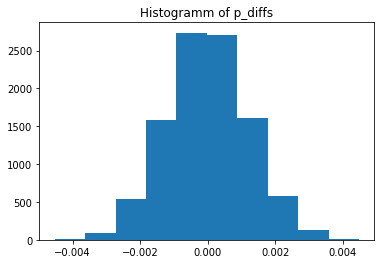

In [35]:
plt.hist(p_diffs);
plt.title('Histogramm of p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
# calculate the actual difference in the dataset to compare it with the estimated one
new_convert = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].count()
old_convert = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].count()

In [37]:
actual_cvt_new = (new_convert) / (n_new) 
actual_cvt_old = (old_convert) / (n_old)

In [38]:
act_diffs = actual_cvt_new - actual_cvt_old

In [39]:
act_diffs

-0.0015782389853555567

In [40]:
# get the p-value
(p_diffs > act_diffs).mean()

0.9052

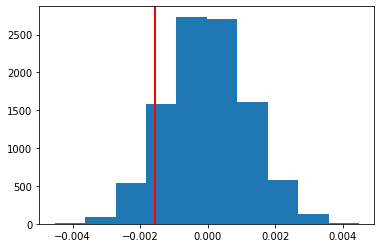

In [41]:
plt.hist(p_diffs);
plt.axvline(act_diffs, c= 'r', linewidth = 2);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j. I computed the p value. The p value is like a probability in which the null is true. In our case we have a high p-value (0.90) which means that we cannot reject the null and can keep the old page since the new page isn't better in aspect of the conversion rate. Usually the null is rejected when the the p-value is below 0.05.**

More on p-value: https://rebeccaebarnes.github.io/2018/05/01/what-is-a-p-value

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [42]:
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].count()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['landing_page'].count()
n_old = df2.query('landing_page == "old_page"')['landing_page'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [43]:
# convert to array
count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])

In [46]:
# alternative larger: since H1 is Pold<Pnew
zstat, p_value = sm.stats.proportions_ztest(count, nobs, alternative = 'larger')

In [47]:
zstat, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [48]:
# norm from scipy contains different functions that can be applied on normal distributed variables 
from scipy.stats import norm
norm.cdf(zstat) 
# https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in

0.09494168724097551

In [49]:
norm.ppf(.95) # get the z score for an error rate of 0.05 (to have 95% confidence)

1.6448536269514722

**Since the the z-score (0.0949) is less than the critical value (1.6449), we failed to reject the null hypothesis. Which is the same as in j.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**This would be best suited for a binary classifier: logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [50]:
df['intercept'] = 1
df[['ab_page2', 'ab_page']] = pd.get_dummies(df['group'])
df = df.drop('ab_page2', axis = 1)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [51]:
log_mod = sm.Logit(df['converted'], df[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:               7.093e-06
Time:                        11:04:12   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

**ab_page has a p-value of 0.216 which is lower than in part 2. As I understand it, beforehand we used a one tailed test and now a two tailed test. A one tailed test means that our hypothesis are biased towards a 'side' (HO: old_page => new_page , H1: old_page < new_page), whereas a two tailed test looks for difference in the outcome 'one both sides' on the distribution (H0: old_page = new_page; H1: old_page != new_page). Since a regression model uses a two tailed test, which should therefore give us a different p-value since the calculation is different. But regardless of the change in p-value, we still fail to reject the null.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In our connected world, things are rarely only connected to one predictor so it makes sense to include more than one predictor in a regression model to uncover relationships between variables. On the other side we shouldn't add to many predictors because the chance that they correlate with each other gets higher with each added predictor (multicollinearity).**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df.set_index('user_id'), how='inner')

In [54]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [55]:
# Let's check how many countries are included
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [56]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [58]:
# only include two of the three countries
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366241
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294475
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:               1.205e-05
Time:                        11:21:08   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2726
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0319      0.026    -78.845      0.000      -2.082      -1.981
UK             0.0450      0.028      1.599      0.110      -0.010       0.100
US             0.0357      0.027      1.340      0.180      -0.017       0.088
==============================================================================
"""

**The individual countries aren't statistical significant (p>0.05) for conversion rate, which means we failed to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
#creat interactions between page and country
df_new['page*CA'] = df_new['ab_page'] * df_new['CA']
df_new['page*UK'] = df_new['ab_page'] * df_new['UK']
df_new['page*US'] = df_new['ab_page'] * df_new['US']

In [60]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page*CA,page*UK,page*US
user_id,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,0,1


In [61]:
# check the interaction calculation
df_new.query('country == "US" and ab_page == "0"')

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page*CA,page*UK,page*US
user_id,,,,,,,,,,,,,
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1,0,0,0
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,0,0,0,1,0,0,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,0,0,0,1,0,0,0
630011,US,2017-01-24 09:27:13.046891,control,old_page,0,1,0,0,0,1,0,0,0
630015,US,2017-01-07 07:42:23.111798,control,old_page,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945985,US,2017-01-06 13:16:47.632102,control,old_page,0,1,0,0,0,1,0,0,0
945988,US,2017-01-08 02:28:52.686358,control,old_page,0,1,0,0,0,1,0,0,0
945991,US,2017-01-06 20:07:28.426277,control,old_page,1,1,0,0,0,1,0,0,0


In [62]:
# again only include k-1 dummy variables 
log_mod1 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page', 'page*UK', 'page*US']])
result1 = log_mod1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366235
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294472
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:               2.833e-05
Time:                        11:23:24   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2955
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9992      0.036    -55.372      0.000      -2.070      -1.928
UK             0.0086      0.040      0.219      0.827      -0.069       0.086
US             0.0120      0.037      0.322      0.747      -0.061       0.085
ab_page       -0.0658      0.052     -1.277      0.202      -0.167       0.035
page*UK        0.0732      0.056      1.300      0.194      -0.037       0.184
page*US        0.0477      0.053      0.896      0.370      -0.057       0.152
==============================================================================
"""

**The interactions are also not statistical significant. Therefore the old and new page are equally effective in terms of user conversion, regarding the hypothesis definition of a regression models two tailed testing.**

<a id='conclusions'></a>
## Conclusions

The results from the computed logistic regression models and A/B test clearly shows that the new page isn't more effective in terms of user conversion. In my opinion the company should continue to use the old page, since it is familiar to the current users and generally people aren't pleased with change.

<a id='resources'></a>
## Resources

- https://rebeccaebarnes.github.io/2018/05/01/what-is-a-p-value
- https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in